In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/nlp-getting-started'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In this competition: we are working on a Natural Language Processing (NLP) challenge where we need to build a machine learning model to classify tweets as either related to real disasters or not.

Here’s a structured approach to get you started:

# 1. Understanding the Problem

**Objective:** Predict whether a tweet is about a real disaster (1) or not (0).

**Dataset:** You have 10,000 tweets that have been hand-classified.

# 2. Dataset

**Files Required:**

train.csv: Used for training the model.

test.csv: Used for making predictions to submit.

sample_submission.csv: Used as a format guide for submission.


**Columns in train.csv:**

**id:** Unique identifier for each tweet.

**text:** Text of the tweet.

**location:** Location from where the tweet was sent (may be blank).

**keyword:** Keyword from the tweet (may be blank).

**target:** Denotes whether the tweet is about a real disaster (1) or not (0).


**Columns in test.csv:**

**id:** Unique identifier for each tweet.

**text:** Text of the tweet.

**location:** Location from where the tweet was sent (may be blank).

**keyword:** Keyword from the tweet (may be blank).


In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style('darkgrid')

In [7]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

# 3. Exploratory Data Analysis (EDA)

**Text Analysis:** Analyze the distribution of tweet lengths, common words, hashtags, etc.

**Missing Data:** Check for missing values in location and keyword columns.

**Class Balance:** Check the balance between disaster and non-disaster tweets.


In [9]:
# Display the first few rows of the training dataset
print(train_df.head())

# Display basic information about the training dataset
print(train_df.info())

# Check for missing values
print(train_df.isnull().sum())

# Check the distribution of the target variable
print(train_df['target'].value_counts())


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
id             0
keyword       61
lo

In [23]:
# Check the balance between disaster and non-disaster tweets
disaster_count = train_df['target'].sum()
non_disaster_count = len(train_df) - disaster_count
total_tweets = len(train_df)

print(f"Total number of tweets: {total_tweets}")
print(f"Number of disaster tweets (target=1): {disaster_count}")
print(f"Number of non-disaster tweets (target=0): {non_disaster_count}")

# Calculate the percentage of each class
disaster_percent = (disaster_count / total_tweets) * 100
non_disaster_percent = (non_disaster_count / total_tweets) * 100

print(f"Percentage of disaster tweets: {disaster_percent:.2f}%")
print(f"Percentage of non-disaster tweets: {non_disaster_percent:.2f}%")


Total number of tweets: 7613
Number of disaster tweets (target=1): 3271
Number of non-disaster tweets (target=0): 4342
Percentage of disaster tweets: 42.97%
Percentage of non-disaster tweets: 57.03%


# 4. Data Preprocessing

**Text Cleaning:** Remove special characters, URLs, emojis, etc.

**Tokenization:** Convert tweets into tokens.

**Vectorization:** Convert text data into numerical format using techniques like TF-IDF, Word2Vec, or embeddings like GloVe.


**Text Cleaning**

In [10]:
import re
from nltk.corpus import stopwords

# Download stopwords if not already available
import nltk
nltk.download('stopwords')

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#'
    text = re.sub(r'\@\w+|\#', '', text)
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

train_df['clean_text'] = train_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Tokenization and Vectorization**
Convert the cleaned text data into numerical format using techniques like TF-IDF.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_df['clean_text'])

# Transform the test data
X_test = vectorizer.transform(test_df['clean_text'])

# Extract the target variable
y_train = train_df['target']


# 5. Model Building

**Baseline Model:** Start with simple models like Logistic Regression, Naive Bayes.

**Advanced Models:** Move to more complex models like Random Forest, XGBoost, or even deep learning models like LSTM, GRU, or BERT.



Build and train a machine learning model to classify the tweets.

**Baseline Model:**
We start with a simple model, such as Logistic Regression.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the training data
train_preds = model.predict(X_train)

# Evaluate the model
print(classification_report(y_train, train_preds))


              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4342
           1       0.92      0.77      0.84      3271

    accuracy                           0.87      7613
   macro avg       0.88      0.86      0.87      7613
weighted avg       0.88      0.87      0.87      7613



# 6. Model Evaluation

**Metrics:** Use accuracy, precision, recall, F1-score to evaluate model performance.

**Cross-Validation:** Ensure the model’s robustness by performing cross-validation.



We can use classification_report from sklearn.metrics to calculate accuracy, precision, recall, and F1-score.

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the training data
train_preds = model.predict(X_train)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_train, train_preds))

# Print accuracy score
print("Accuracy:", accuracy_score(y_train, train_preds))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4342
           1       0.92      0.77      0.84      3271

    accuracy                           0.87      7613
   macro avg       0.88      0.86      0.87      7613
weighted avg       0.88      0.87      0.87      7613

Accuracy: 0.8727177196900039



We can use cross_val_score from sklearn.model_selection to perform cross-validation.

In [14]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and the mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.73079448 0.64543664 0.68089297 0.69316689 0.76215506]
Mean Cross-Validation Score: 0.7024892083972172


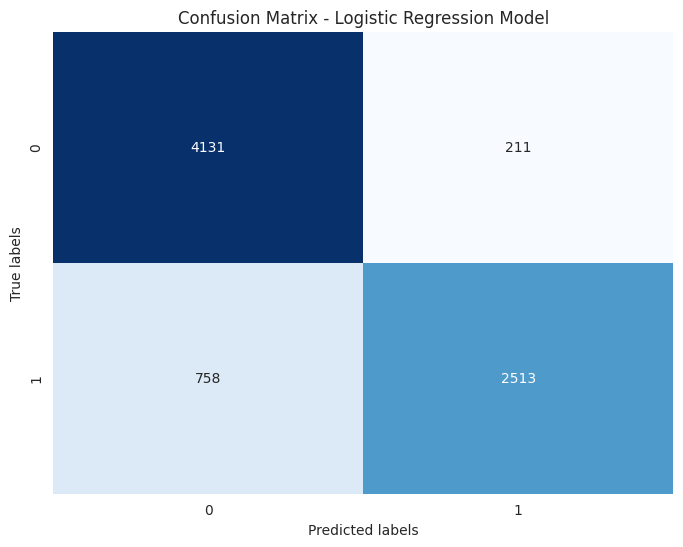

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4342
           1       0.92      0.77      0.84      3271

    accuracy                           0.87      7613
   macro avg       0.88      0.86      0.87      7613
weighted avg       0.88      0.87      0.87      7613



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained and obtained predictions from your Logistic Regression model
# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model (if not already trained)
logreg_model.fit(X_train, y_train)

# Predict on the training data
y_pred = logreg_model.predict(X_train)

# Generate confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_train, y_pred))


# 7. Prediction and Submission

**Prediction:** Use the trained model to predict on test.csv.

**Submission:** Format the predictions as per sample_submission.csv and submit.


In [25]:
# Predict on the test data
test_preds = model.predict(X_test)
test_preds

# Prepare the submission file
submission = pd.DataFrame({'id': test_df['id'], 'target': test_preds})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [26]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
